**1. Importing Necessary Libraries**


This block imports all necessary libraries, including pandas for data handling, sklearn for machine learning, and re for text preprocessing.

In [26]:
# Importing required libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.metrics import accuracy_score

**2: Text Preprocessing Function**

This block defines the preprocess_text() function, which will be used to clean the text before feeding it into the model.

In [27]:
# Text preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text


**3. Data Loading and Preprocessing**

This block defines the load_and_preprocess_data() function, which loads the dataset, handles missing values, and prepares the data for training. It ensures that the dataset is ready for further processing.

In [28]:
# Load and preprocess data
def load_and_preprocess_data(file_path):
    df = pd.read_excel(file_path)

    # Handle missing values
    df['review_text'].fillna("Missing Text", inplace=True)
    df['label'].fillna(df['label'].mode()[0], inplace=True)

    # Fill non-critical columns with placeholder values
    df.fillna({'review_id': 'unknown', 'user_id': 'unknown', 'product_id': 'unknown',
               'rating': df['rating'].median(), 'review_date': 'unknown',
               'is_bot': 0, 'comment': 'No comment', 'source': 'unknown', 'timestamp': pd.Timestamp.now()}, inplace=True)

    df['review_text'] = df['review_text'].str.strip()

    return df


**4. Data Visualization**

This block provides two functions for visualizing the class distribution and text length distribution in the dataset.

In [29]:
# Plotting functions
def plot_class_distribution(df):
    plt.figure(figsize=(8, 6))
    sns.countplot(x='label', data=df)
    plt.title("Class Distribution")
    plt.show()

def plot_text_length_distribution(df):
    df['text_length'] = df['review_text'].apply(len)
    plt.figure(figsize=(8, 6))
    sns.histplot(df['text_length'], bins=50)
    plt.title("Text Length Distribution")
    plt.show()


**5. Main Execution Block**

In this block, you load the dataset using the load_and_preprocess_data() function, and then call the plotting functions to visualize the class distribution and text length distribution. This should be placed after defining all functions so that everything is set up before training the model.

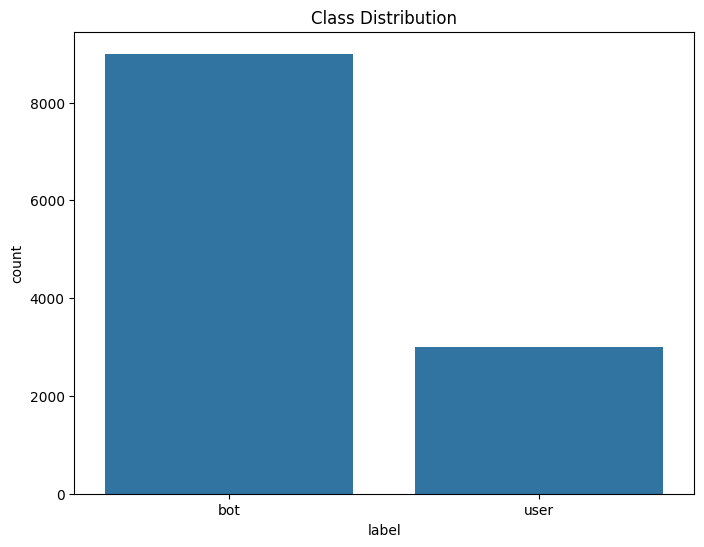

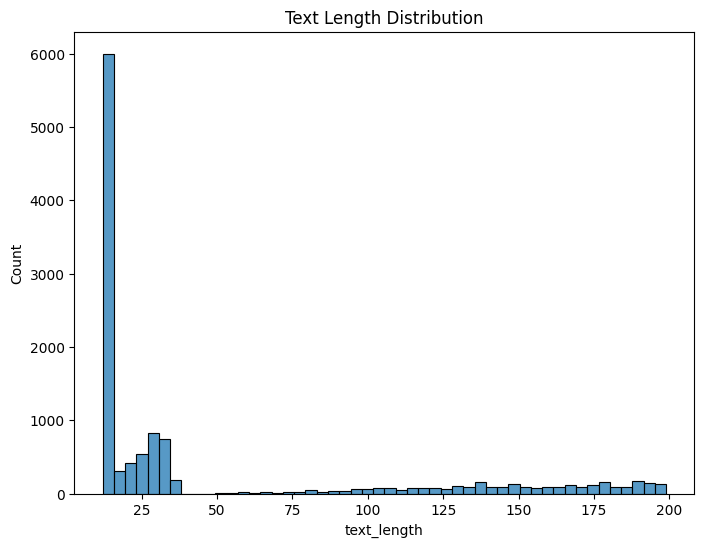

In [30]:
# Main execution
file_path = '/content/drive/MyDrive/combined_dataset.xlsx'
df = load_and_preprocess_data(file_path)

# Visualize the data
plot_class_distribution(df)
plot_text_length_distribution(df)

# Text Vectorization with TF-IDF, using 'english' stop words
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['review_text']).toarray()
y = df['label'].apply(lambda x: 1 if x == 'bot' else 0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**6. Model Training and Accuracy Calculation**

This block trains a RandomForestClassifier, evaluates its accuracy on the test set, and stores the model in a dictionary.

In [34]:


# Train the Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Model Accuracy: {accuracy * 100:.2f}%")

# Store the trained model in a dictionary
models = {
    'Random Forest': rf_model
}


Random Forest Model Accuracy: 74.42%


**7. Prediction Function**

This block defines the predict_comment() function that takes an input comment, preprocesses it, converts it into a TF-IDF vector, and makes predictions using the trained model.

In [32]:
# Define the prediction function
def predict_comment(comment, models, tfidf, nn_model=None):
    # Preprocess the comment
    cleaned_comment = preprocess_text(comment)
    comment_tfidf = tfidf.transform([cleaned_comment])

    predictions = {}
    for name, model in models.items():
        y_pred = model.predict(comment_tfidf)
        prediction = 'User' if y_pred[0] == 0 else 'Bot'
        predictions[name] = prediction

    if nn_model:
        y_pred_prob = nn_model.predict(comment_tfidf.toarray())
        if y_pred_prob.ndim == 1:
            y_pred_classes = (y_pred_prob > 0.5).astype(int)
        else:
            y_pred_classes = np.argmax(y_pred_prob, axis=1)
        predictions['Neural Network'] = 'User' if y_pred_classes[0] == 0 else 'Bot'

    return predictions


**8.user interaction.**

This block allows for user interaction. A comment is inputted, classified, and the predictions are displayed.

In [33]:
# Example usage
comment_input = input("Enter a comment to classify: ")
predictions = predict_comment(comment_input, models, vectorizer)
print("Predictions:")
for name, prediction in predictions.items():
    print(f"{name} Prediction: {prediction}")


Enter a comment to classify: Support new environmental regulations!
Predictions:
Random Forest Prediction: Bot
